# Analyzing Naira Land Data

[Nairaland](https://www.nairaland.com/) is an an online community created by Seun Osewa in March 2005. This project offers to analyze posts on Nairaland from March 25 2005 till July 14 2007. The dataset can be found [here](https://t.co/jDYvZref1S?amp=1).

In [1]:
#import some useful libraries

import pandas as pd
import numpy as np

In [2]:
#Read in the dataset

data = pd.read_json('nairaland-50k.json')
data.head()

,_id,class_,comments,topic,topic_id,url,view_count
0,{'$oid': '5ddd27c829bb729ddffd726a'},"[ TV, Movies , Low-cost Digital Cable in Nig...","[{'user': 'kodewrita', 'timestamp': '4:39pm On...",Low-cost Digital Cable in Nigeria - TV/Movies ...,18,https://www.nairaland.com/18/low-cost-digital-...,7821
1,{'$oid': '5ddd27c929bb729ddffd726b'},"[ General , Religion , Praying Amiss (3459 ...","[{'user': 'kodewrita', 'timestamp': '6:11pm On...",Praying Amiss - Religion - Nigeria,20,https://www.nairaland.com/20/praying-amiss,3459
2,{'$oid': '5ddd27c929bb729ddffd726c'},"[ General , Family , Family Relationship (4...","[{'user': 'Chigszy', 'timestamp': '6:37pm On M...",Family Relationship - Family - Nigeria,14,https://www.nairaland.com/14/family-relationship,4847
3,{'$oid': '5ddd27cc29bb729ddffd726d'},"[ General , New Members, Introduce Yourselve...","[{'user': 'dominobaby', 'timestamp': '1:51pm O...","New Members, Introduce Yourselves! - Nairaland...",15,https://www.nairaland.com/15/new-members-intro...,4423
4,{'$oid': '5ddd27d029bb729ddffd726e'},"[ General , Family , Domesticating Nigerian...","[{'user': 'Chigszy', 'timestamp': '2:33am On M...",Domesticating Nigerian Men - Family - Nigeria,19,https://www.nairaland.com/19/domesticating-nig...,10305


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 7 columns):
_id           50000 non-null object
class_        50000 non-null object
comments      49999 non-null object
topic         50000 non-null object
topic_id      50000 non-null int64
url           50000 non-null object
view_count    50000 non-null int64
dtypes: int64(2), object(5)
memory usage: 2.7+ MB


In [4]:
len(set(data['topic']))

48110

### Details:

- _The dataset contains 50,000 rows and 7 columns with a 400+ mb size._
- _There are over 48,000 unique topics in this dataset_
- _There is one nan value in the comments column_
- _There are two numerical columns, topic-id and view-count_

In [5]:
data[data['comments'].isna()]

,_id,class_,comments,topic,topic_id,url,view_count
29043,{'$oid': '5ddd7aad29bb729ddffde3dd'},"[ General , Jobs, Vacancies , Help On Ibtc ...",NaN,Help On Ibtc Bank Aptitude Test Format ?{ Chee...,38383,https://www.nairaland.com/38383/ibtc-bank-apti...,852


In [6]:
data[data['comments'].isna()]['url']

29043    https://www.nairaland.com/38383/ibtc-bank-apti...
Name: url, dtype: object

## Nan Value

At the time this dataset was obtained, this [post](https://www.nairaland.com/38383/ibtc-bank-apti...) had no comment. We will remove this from the dataset as it doesn't provide much of an insight.

In [7]:
#Drop na row
data.dropna(inplace=True)

#confirm no more nan values in dataset
data.isna().sum()

_id           0
class_        0
comments      0
topic         0
topic_id      0
url           0
view_count    0
dtype: int64

## Gaining Further Insights

In [8]:
#Create a new column showing the number of comments in each post

data['no_comm'] = data['comments'].apply(len)
data.head()

,_id,class_,comments,topic,topic_id,url,view_count,no_comm
0,{'$oid': '5ddd27c829bb729ddffd726a'},"[ TV, Movies , Low-cost Digital Cable in Nig...","[{'user': 'kodewrita', 'timestamp': '4:39pm On...",Low-cost Digital Cable in Nigeria - TV/Movies ...,18,https://www.nairaland.com/18/low-cost-digital-...,7821,18
1,{'$oid': '5ddd27c929bb729ddffd726b'},"[ General , Religion , Praying Amiss (3459 ...","[{'user': 'kodewrita', 'timestamp': '6:11pm On...",Praying Amiss - Religion - Nigeria,20,https://www.nairaland.com/20/praying-amiss,3459,5
2,{'$oid': '5ddd27c929bb729ddffd726c'},"[ General , Family , Family Relationship (4...","[{'user': 'Chigszy', 'timestamp': '6:37pm On M...",Family Relationship - Family - Nigeria,14,https://www.nairaland.com/14/family-relationship,4847,12
3,{'$oid': '5ddd27cc29bb729ddffd726d'},"[ General , New Members, Introduce Yourselve...","[{'user': 'dominobaby', 'timestamp': '1:51pm O...","New Members, Introduce Yourselves! - Nairaland...",15,https://www.nairaland.com/15/new-members-intro...,4423,155
4,{'$oid': '5ddd27d029bb729ddffd726e'},"[ General , Family , Domesticating Nigerian...","[{'user': 'Chigszy', 'timestamp': '2:33am On M...",Domesticating Nigerian Men - Family - Nigeria,19,https://www.nairaland.com/19/domesticating-nig...,10305,192


In [9]:
np.sum(data['no_comm'])

951776

__There are over Nine Hundred and Fifty Thousand Comments in this dataset__

In [10]:
data.sort_values(by = 'no_comm', ascending=False).head()

,_id,class_,comments,topic,topic_id,url,view_count,no_comm
763,{'$oid': '5ddd2b7b29bb729ddffd7565'},"[ General , hot-angel, nike4luv, Latoya - th...","[{'user': 'Latoya', 'timestamp': '5:01am On Au...","hot-angel, nike4luv, Latoya - the bootylicious...",1142,https://www.nairaland.com/1142/hot-angel-nike4...,24223,288
1009,{'$oid': '5ddd2c9c29bb729ddffd765b'},"[ Forum Games , The Chain Word Game (74690 V...","[{'user': 'queen2', 'timestamp': '6:54pm On Au...",The Chain Word Game - Forum Games - Nigeria,1486,https://www.nairaland.com/1486/chain-word-game,74690,288
3388,{'$oid': '5ddd35ae29bb729ddffd7fa6'},"[ Music, Radio , Rap Battles , 50 Cent vs J...","[{'user': 'yummy', 'timestamp': '9:13am On Jan...",50 Cent vs Ja Rule: Who Raps Best? <caution> -...,4744,https://www.nairaland.com/4744/50-cent-vs-ja-rule,41333,288
21695,{'$oid': '5ddd68bd29bb729ddffdc729'},"[ Forum Games , Who Has The Highest Post? (2...","[{'user': 'twinstaiye', 'timestamp': '9:54am O...",Who Has The Highest Post? - Forum Games - Nigeria,29059,https://www.nairaland.com/29059/highest-post,26847,288
3376,{'$oid': '5ddd35a229bb729ddffd7f9a'},"[ Forum Games , Confessions (87738 Views) ]","[{'user': 'immanuella', 'timestamp': '2:38am O...",Confessions - Forum Games - Nigeria,4724,https://www.nairaland.com/4724/confessions,87738,288


### We see that that there is a tie on the highest number of comments, so I will include number of views

In [11]:
top_comm = data.sort_values(by = 'no_comm', ascending=False)
top_comm[top_comm['no_comm'] == 288].sort_values(by = 'view_count', ascending=True).head()

,_id,class_,comments,topic,topic_id,url,view_count,no_comm
877,{'$oid': '5ddd2c0b29bb729ddffd75d7'},"[ General , kadejayi - Kayode or Kay (5217 V...","[{'user': 'kadejayi', 'timestamp': '10:08am On...",kadejayi - Kayode or Kay - Nairaland / General...,1290,https://www.nairaland.com/1290/kadejayi-kayode...,5217,288
930,{'$oid': '5ddd2c4529bb729ddffd760c'},"[ General , Romance , Dating And Meet-up Zon...","[{'user': 'WesleyanA', 'timestamp': '10:45pm O...",Nairaland Couples - Dating And Meet-up Zone - ...,1373,https://www.nairaland.com/1373/nairaland-couples,5502,288
49161,{'$oid': '5dddab4b29bb729ddffe3273'},"[ Forum Games , Song Game (6172 Views) ]","[{'user': 'luxoire', 'timestamp': '11:47am On ...",Song Game - Forum Games - Nigeria,64862,https://www.nairaland.com/64862/song-game,6172,288
1048,{'$oid': '5ddd2cca29bb729ddffd7682'},"[ General , DE-KING, Unique & Simply Authent...","[{'user': 'DEKING3', 'timestamp': '11:48am On ...","DE-KING, Unique & Simply Authentic - Nairaland...",1558,https://www.nairaland.com/1558/de-king-unique-...,6477,288
10669,{'$oid': '5ddd4bbf29bb729ddffd9c17'},"[ Forum Games , Like Him, her,like It Dont L...","[{'user': 'eveseh', 'timestamp': '3:15pm On Ju...","Like Him/her,like It Dont Like It - Forum Game...",14649,https://www.nairaland.com/14649/like-him-herli...,7171,288


### Despite the fact that this [post](https://www.nairaland.com/1290/kadejayi-kayode-kay) had the lowest number of views, it still racked up the highest number of comments

# Category

Category in [nairaland](https://www.nairaland.com/) talks about which section or tag a post will fall under. Various categories can be seen in the image below.

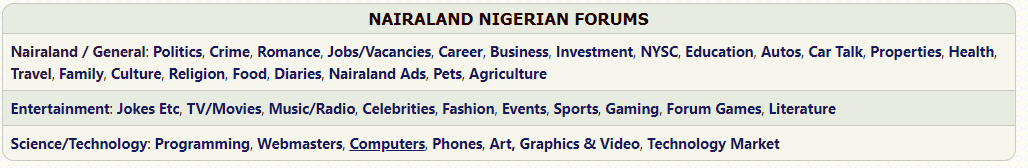

In [12]:
#Create a new column showing which category(or tag) the post can be found in

def ind_class(df):
    #This function strips each string on whitespace to avoid duplicates and returns the first string in the list
    
    i = [val.strip(' ') for val in df]
    return i[0]

#The apply method is used to do a row wise execution of the function which is faster tha a for loop

data['category'] = data['class_'].apply(ind_class)
data.head()

,_id,class_,comments,topic,topic_id,url,view_count,no_comm,category
0,{'$oid': '5ddd27c829bb729ddffd726a'},"[ TV, Movies , Low-cost Digital Cable in Nig...","[{'user': 'kodewrita', 'timestamp': '4:39pm On...",Low-cost Digital Cable in Nigeria - TV/Movies ...,18,https://www.nairaland.com/18/low-cost-digital-...,7821,18,TV
1,{'$oid': '5ddd27c929bb729ddffd726b'},"[ General , Religion , Praying Amiss (3459 ...","[{'user': 'kodewrita', 'timestamp': '6:11pm On...",Praying Amiss - Religion - Nigeria,20,https://www.nairaland.com/20/praying-amiss,3459,5,General
2,{'$oid': '5ddd27c929bb729ddffd726c'},"[ General , Family , Family Relationship (4...","[{'user': 'Chigszy', 'timestamp': '6:37pm On M...",Family Relationship - Family - Nigeria,14,https://www.nairaland.com/14/family-relationship,4847,12,General
3,{'$oid': '5ddd27cc29bb729ddffd726d'},"[ General , New Members, Introduce Yourselve...","[{'user': 'dominobaby', 'timestamp': '1:51pm O...","New Members, Introduce Yourselves! - Nairaland...",15,https://www.nairaland.com/15/new-members-intro...,4423,155,General
4,{'$oid': '5ddd27d029bb729ddffd726e'},"[ General , Family , Domesticating Nigerian...","[{'user': 'Chigszy', 'timestamp': '2:33am On M...",Domesticating Nigerian Men - Family - Nigeria,19,https://www.nairaland.com/19/domesticating-nig...,10305,192,General


In [13]:
#Pivot table showing how many comments topics and views

category_pivot = data.pivot_table(values=['no_comm', 'view_count'], index='category', aggfunc=np.sum)

#Category with the highest number of comments
category_pivot.sort_values(by='no_comm', ascending=False).head()

,no_comm,view_count
category,,
General,592161,104989715
Technology,52772,15360503
Sports,52361,5942467
Forum Games,50215,6391705
Music,49755,9540717


In [14]:
#Visualize the result

import matplotlib.pyplot as plt
import matplotlib.style as style

%matplotlib inline
style.use('fivethirtyeight')

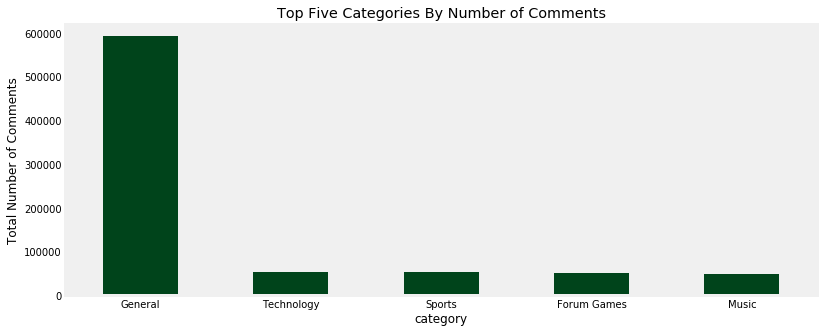

In [15]:
top_five_category_by_comm = category_pivot.sort_values(by='no_comm', ascending=False).head()
top_five_category_by_comm['no_comm'].plot(kind='bar',
                              figsize=(12,5),
                              rot=0,
                              colormap = plt.cm.BuGn_r,
                              title = 'Top Five Categories By Number of Comments')
plt.ylabel('Total Number of Comments')
plt.grid()
plt.show()

top_five_category_by_comm['view_count'].plot(kind='bar',
                              figsize=(12,5),
                              rot=0,
                              colormap = plt.cm.PuOr_r,
                              title = 'Top Five Categories By Number of Views')
plt.ylabel('Total Number of Views')
plt.grid()
plt.show()

##### _The General category have over a 100 million views and 50,000 comments_

# The Top Post

- The post with the highest number of views will be analyzed to see if insights like topic and gender variation can be seen

In [16]:
np.max(data['view_count'])

1420502

In [17]:
data[data['view_count'] == np.max(data['view_count'])]

,_id,class_,comments,topic,topic_id,url,view_count,no_comm,category
39156,{'$oid': '5ddd932e29bb729ddffe0b5e'},"[ General , Travel , Nairobi Photos (kenya)...","[{'user': 'Constantin', 'timestamp': '4:05pm O...",Nairobi Photos (kenya): A Beautiful East Afric...,51356,https://www.nairaland.com/51356/nairobi-photos...,1420502,284,General


In [18]:
#Using the index of the post with the highest number of views
top_post = data.iloc[39155,]
top_post

_id                        {'$oid': '5ddd932e29bb729ddffe0b5e'}
class_        [ General ,  Travel  ,  Nairobi Photos (kenya)...
comments      [{'user': 'Constantin', 'timestamp': '4:05pm O...
topic         Nairobi Photos (kenya): A Beautiful East Afric...
topic_id                                                  51356
url           https://www.nairaland.com/51356/nairobi-photos...
view_count                                              1420502
no_comm                                                     284
category                                                General
Name: 39156, dtype: object

In [19]:
#The comments in this post will be analyzed

top_post_comm = {}
counter = 0
for i in top_post['comments']:
    top_post_comm[counter] = i
    counter += 1
    
top_post_comm

{0: {'user': 'Constantin',
  'timestamp': '4:05pm On Apr 30, 2007 ',
  'text': 'Nairobi capital of Kenya. It is one of AfricaÂ´s most modern cities and it lloks fine! However, it is a pity that it looks more modern than Lagos and Kenya hasnÂ´t got any oil or natural gas![img]http://img71.exs.cx/img71/8474/pict0156a7cp.jpg[/img]old but well-preserved historic momunments from British Rule in Kenyaview from abovestreet cafÃ©s, this could be England at a mall in Nairobi more Nairobi Mallssome old British style hotels London Capsa highschool in Nairobi Memorial Library Luxury shopping mall in Nairobi NairobiÂ´s pavementsPROUD Massai peoplePanari skycentre AND ICE SKATING RINKSo Kenya has no oil., and look at the results, nigeria has oil and neither Lagos nor Abuja can compete with Nairobi so what the hell is wrong with us?                   , TO BE CONTINUED  15 Likes  ',
  'attachments': [],
  'sex': 'f',
  'pageId': 0},
 1: {'user': 'Constantin',
  'timestamp': '2:25pm On May 01, 2007 ',


In [20]:
#Convert the dictionary into a Dataframe

top_post_comm_df = pd.DataFrame(top_post_comm)
top_post_comm_df = top_post_comm_df.transpose()
top_post_comm_df.head()

,attachments,pageId,sex,text,timestamp,user
0,[],0,f,Nairobi capital of Kenya. It is one of AfricaÂ...,"4:05pm On Apr 30, 2007",Constantin
1,[],0,f,This is NairobiÂ´s Central Park Old British st...,"2:25pm On May 01, 2007",Constantin
2,[],0,m,I have not had the good fortune to visit Nairo...,"2:35pm On May 01, 2007",VOR
3,[],0,f,Very nice pictures.But I was watching the Amer...,"1:29pm On May 02, 2007",omoge
4,[],0,f,"Lovely city, However they have very poor slum ...","3:14pm On May 02, 2007",londoner


In [21]:
top_post_comm_df['sex'].value_counts(dropna=False, normalize=True)

f    0.503521
m    0.496479
Name: sex, dtype: float64

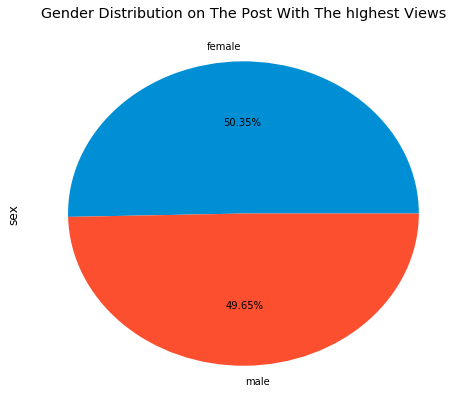

In [22]:
#visualize the result

top_post_comm_df['sex'].value_counts(dropna=False, normalize=True).plot(
                                                             kind = 'pie',
                                                             title = 'Gender Distribution on The Post With The hIghest Views',
                                                             labels = ['female', 'male'],
                                                             autopct = '%2.2f%%',
                                                             figsize=(7,7)
                                                                        )
plt.grid()
plt.show()

__The chart above shows an almost even distribution between the number of comments of men and women.__

# Analyzing the 'When'

- We will look into the timestam column and have a glimpe of the distribution of the dates there

In [23]:
import datetime as dt

#convert the timestamp column to datetime object
top_post_comm_df['timestamp'] = pd.to_datetime(top_post_comm_df['timestamp'])

top_post_comm_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 284 entries, 0 to 283
Data columns (total 6 columns):
attachments    284 non-null object
pageId         284 non-null object
sex            284 non-null object
text           284 non-null object
timestamp      284 non-null datetime64[ns]
user           284 non-null object
dtypes: datetime64[ns](1), object(5)
memory usage: 15.5+ KB


In [24]:
#create the year column and month column
top_post_comm_df['year'] = top_post_comm_df['timestamp'].dt.year
top_post_comm_df['month'] =top_post_comm_df['timestamp'].dt.strftime('%B')
top_post_comm_df.head()

,attachments,pageId,sex,text,timestamp,user,year,month
0,[],0,f,Nairobi capital of Kenya. It is one of AfricaÂ...,2007-04-30 16:05:00,Constantin,2007,April
1,[],0,f,This is NairobiÂ´s Central Park Old British st...,2007-05-01 14:25:00,Constantin,2007,May
2,[],0,m,I have not had the good fortune to visit Nairo...,2007-05-01 14:35:00,VOR,2007,May
3,[],0,f,Very nice pictures.But I was watching the Amer...,2007-05-02 13:29:00,omoge,2007,May
4,[],0,f,"Lovely city, However they have very poor slum ...",2007-05-02 15:14:00,londoner,2007,May


In [25]:
top_post_comm_df['year'].value_counts(dropna=False, normalize=True)

2007    0.982394
2008    0.017606
Name: year, dtype: float64

In [26]:
top_post_comm_df['month'].value_counts(dropna=False)

December     75
August       58
September    43
October      28
July         27
June         22
November     21
January       5
May           4
April         1
Name: month, dtype: int64

#### _98% of the comments in this post was done in 2007._

# Users

In [27]:
len(set(top_post_comm_df['user']))

90

__There are Ninety users that commented on this post__

In [28]:
top_post_comm_df['user'].value_counts(dropna=False).head()

Ropie         36
ignorant      30
maasai1       30
africanese    23
9ja4eva       14
Name: user, dtype: int64

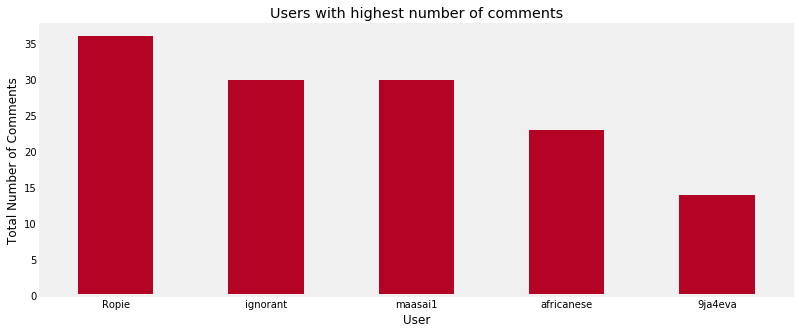

In [29]:
#Visualize the result

top_post_comm_df['user'].value_counts(dropna=False).head().plot(kind='bar',
                              figsize=(12,5),
                              rot=0,
                              colormap = plt.cm.coolwarm_r,
                              title = 'Users with highest number of comments')

plt.ylabel('Total Number of Comments')
plt.xlabel('User')
plt.grid()
plt.show()

# Next Steps

The data can be analyzed to answer the following questions

- How many users in the dataset?
- Which topic do men like most?
- Which topic do women like most?

# Thank You